# **Insper - Eletromagnetismo e Ondulatória** #


**Projeto**



In [1]:
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definindo valores dos capacitores e frequências analisados
Cs = [150*1e-9, 0.1*1e-6, 0.47*1e-6, 1e-6, 4.7*1e-6]
Cs_labels = ['150nF', '0.1uF', '0.47uF', '1uF', '4.7uF']
fs = np.arange(1, 100*1e3, 10)

# Definindo valores dos componentes
Rc = 20
k = 0.2
V1 = 4.5*(2/(np.pi))

c) Observe a função que criamos na célula abaixo. Tente explicar o que ela faz.

In [3]:
# Transoformador em série
# 19 é 1
def CalcularTransformadorSerie(Uf, c, f):
    # Capacitores 1 e 2
    C1 = c
    C2 = c
    
    # Indutâncias 1 e 2
    w = 2*np.pi*f
    L1 = 19.14*1e-6
    L2 = 17.61*1e-6

    # Resistência mínima das bobinas
    R1 = 0.181
    R2 = 0.163

    
    # Efeito pelicular das bobinas
    # R1 = R1 + (R1*f)/(1e5)
    # R2 = R2 + (R2*f)/(1e5)

    # Indutância mútua
    M = k * sqrt(L1 * L2)
    
    # Impedâncias
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1/(w * C1))
    XC2 = complex(0, -1/(w * C2))
    XM = complex(0, w * M)
    
    # Matriz de impedâncias
    Z=np.array([
        [R1 + XL1 + XC1, -XM], 
        [-XM, XL2 + R2 + XC2 + Rc]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    # Retorna I1 e I2
    return i[0], i[1], L1


def CalcularTransformadorParalelo(Uf, c, f, r):
    # Capacitores 1 e 2
    C1 = c
    C2 = c
    
    # Indutâncias 1 e 2
    w = 2*np.pi*f
    
    L1 = 19.14*1e-6
    L2 = 17.61*1e-6
    
    # Resistência mínima das bobinas
    # R1 = 0.181
    # R2 = 0.163
    R1 = 0.3
    R2 = 0.3
    
    # Efeito pelicular das bobinas
    # R1 = R1 + (R1*f)/(1e5)
    # R2 = R2 + (R2*f)/(1e5)

    # Indutância mútua
    M = k * sqrt(L1 * L2)
    
    # Impedâncias
    XL1 = complex(0, w * L1)
    XL2 = complex(0, w * L2)
    XC1 = complex(0, -1/(w * C1))
    XC2 = complex(0, -1/(w * C2))
    XM = complex(0, w * M)
    
    # Impedância equivalente do capacitor 2 e resistor em paralelo
    Zeq_C2_RC = (Rc*XC2)/(Rc+XC2)
    
    # Matriz de impedâncias
    Z=np.array([
        [R1 + XL1 + XC1, -XM], 
        [-XM, R2 + XL2 + Zeq_C2_RC]])
    V=np.array([Uf,0])
    i=np.dot(linalg.inv(Z),V)
    
    # Corrente no resistor de carga
    i_rc = (XC2*i[1])/(Rc+XC2)
    
    # Retorna I1, I2, Zeq_C2_RC, I_RC
    return i[0], i[1], Zeq_C2_RC, i_rc

In [4]:
resultados_serie = {}
resultados_paralelo = {}

# Calculando os resultados de V2 e eficiência para cada configuração de 
for c in Cs:
    V2s_serie = []
    ns_serie = []
    
    V2s_paralelo = []
    ns_paralelo = []
    
    # Calculando para cada frequência
    for f in fs:
        # Calculando para transformador em série
        i1, i2, L1 = CalcularTransformadorSerie(V1, c, f)
        
        # Calculando V2 e eficiência
        V2 = i2*Rc
        s1 = V1*i1.conjugate()/2
        s2 = V2*i2.conjugate()/2
        n = np.real(s2)/np.real(s1)
        
        V2s_serie.append(abs(V2))
        ns_serie.append(n*100)
        resultados_serie[c] = {"V2": V2s_serie, "n": ns_serie}
        
        # Calculando para transformador em paralelo
        i1, i2, Zeq_C2_RC, i_rc = CalcularTransformadorParalelo(V1, c, f, 0)
        
        # Calculando V2 e eficiência
        V2 = i2*Zeq_C2_RC
        s1 = V1*i1.conjugate()/2
        s2 = V2*i_rc.conjugate()/2
        n = np.real(s2)/np.real(s1)
        
        V2s_paralelo.append(abs(V2))
        ns_paralelo.append(n*100)
        resultados_paralelo[c] = {"V2": V2s_paralelo, "n": ns_paralelo}

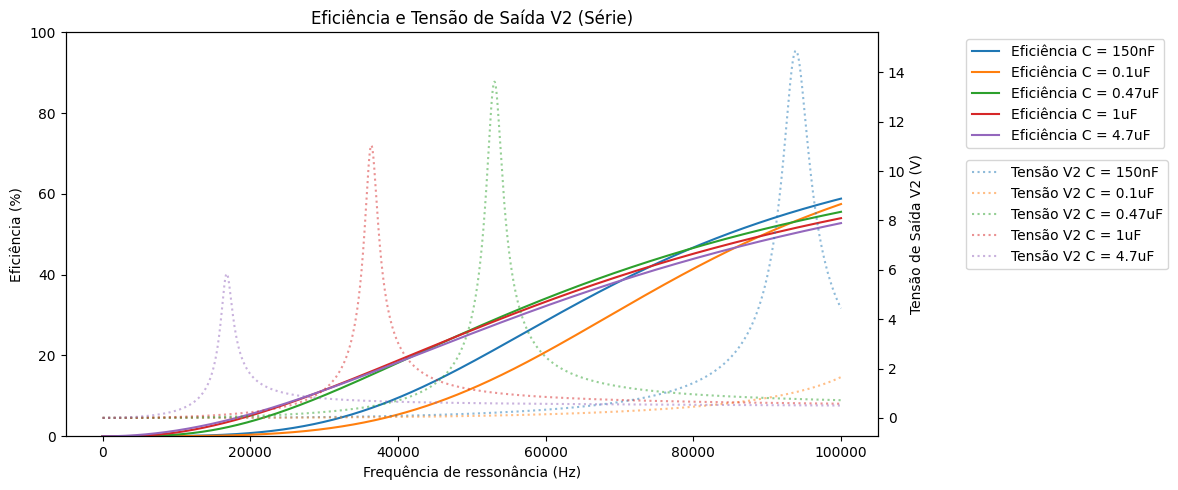

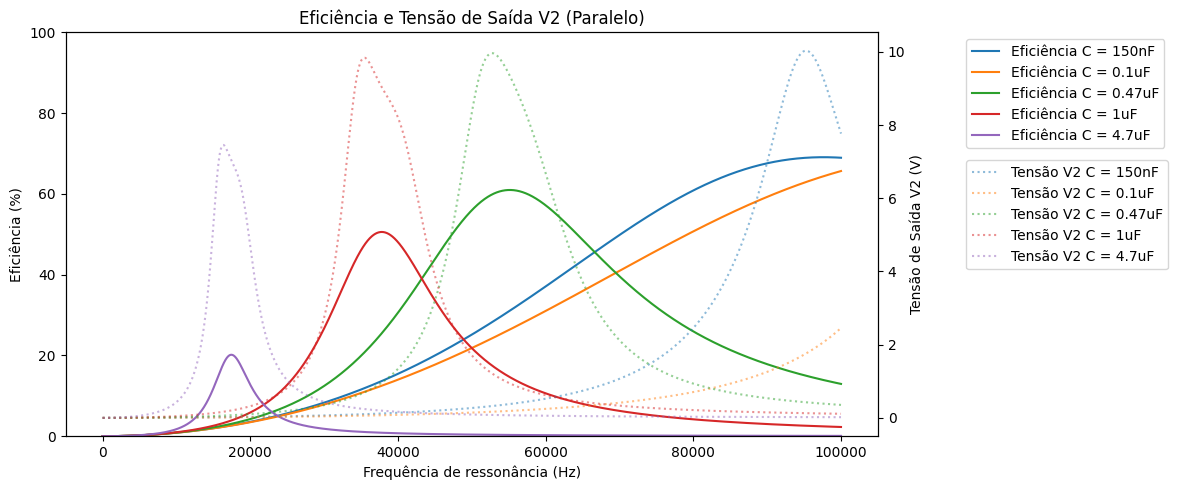

55141.0


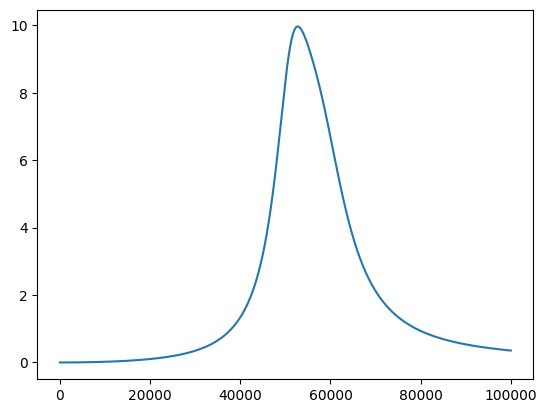

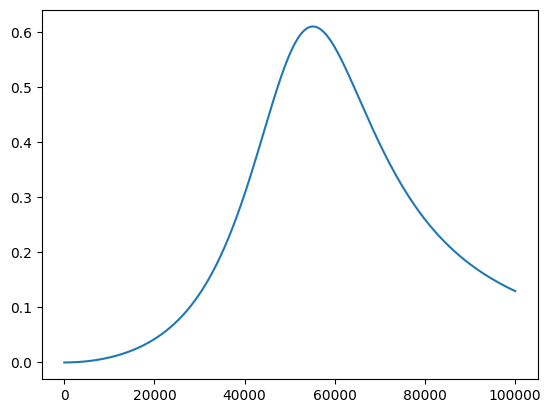

In [6]:
lista = []
lista_n = []
maior = 0
f_maior = 0
V1 = 4.5*(2/(np.pi))
for f in fs:
    i1, i2, Zeq_C2_RC, i_rc = CalcularTransformadorParalelo(V1, 0.47*1e-6, f, 0)
        
    # Calculando V2 e eficiência
    V2 = i2*Zeq_C2_RC
    s1 = V1*i1.conjugate()/2
    s2 = V2*i_rc.conjugate()/2
    n = np.real(s2)/np.real(s1)
    
    lista_n.append(n)
    
    if maior < n:
        maior = n
        f_maior = f
    lista.append(abs(V2))
    
    

print(f_maior)

plt.plot(fs, lista)
plt.show()

plt.plot(fs, lista_n)
plt.show()

In [7]:
print(f_maior)
V1 = 6*(2/(np.pi))
i1, i2, Zeq_C2_RC, i_rc = CalcularTransformadorParalelo(V1, 0.47*1e-6, f_maior, 0)

# Calculando V2 e eficiência
V2 = i2*Zeq_C2_RC
s1 = V1*i1.conjugate()/2
s2 = V2*i_rc.conjugate()/2
n = np.real(s2)/np.real(s1)

print(f"i1: {abs(i1)}")
print(f"i2: {abs(i2)}")
print(f"L1: {L1}")
print(f"V2: {abs(V2)}")
print(f"s1: {s1}")
print(f"s2: {s2}")
print(f"n: {n*100}%")

55141.0
i1: 3.4738473146308415
i2: 2.1230981403616247
L1: 1.914e-05
V2: 12.46386677482219
s1: (6.3699735063591465+1.8549445843241337j)
s2: (3.8836993745129123-1.1102230246251565e-16j)
n: 60.96884658367596%


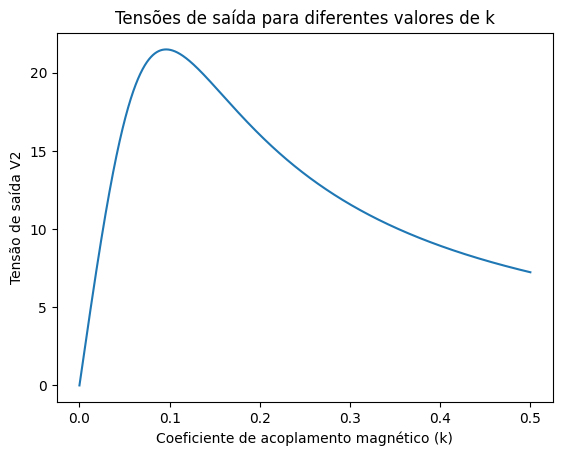

In [8]:
Rc = 100
V1 = 6*(2/(np.pi))
ks = np.arange(0, 0.5, 1e-4)
V2s = []
for k in ks:
    i1, i2, Zeq_C2_RC, i_rc = CalcularTransformadorParalelo(V1, 0.47*1e-6, 55000, 0)
    
    # Calculando V2 e eficiência
    V2 = i2*Zeq_C2_RC
    V2s.append(abs(V2))

plt.plot(ks, V2s)
plt.title("Tensões de saída para diferentes valores de k")
plt.xlabel("Coeficiente de acoplamento magnético (k)")
plt.ylabel("Tensão de saída V2")
plt.show()